## Reading external data & Plotting

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Pandas pode, facilmente, ler os dados armazenados em diferentes tipos de arquivo (CSV, JSON, XML ou Excel). A análise sempre envolve especificar a estrutura correta, codificação, etc. O método `read_csv` lê os arquivos CSV e aceita inúmeros parâmetros.

In [7]:
df = pd.read_csv('data/btc-market-price.csv')

In [8]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


Esse arquivo CSV possui apenas duas colunas: `timestamp` e `price`. Ele não possui um header, contudo, pandas irá automaticamente atribuir a primeira linha como header.

Para lidarmos com isso, estabelecemos:

In [9]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


Com isso, podemos definir explicitamente o nome de cada coluna através do método `df.columns`:

In [10]:
df.columns = ['Timestamp', 'Price']
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [11]:
df.shape

(365, 2)

In [12]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


O tipo da coluna `Price` foi corretamente interpretada como `float`, mas a coluna `Timestamp` foi interpretada como uma _regular string_(`object` na notação pandas):

In [13]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

Nós podemos performar uma operação vetorizada para analisarmos todos os valores de Timestamp como `Datetime` objects:

In [14]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [16]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

Podemos mudar o _autoincremental ID_ gerado pelo pandas e usar a coluna `Timestamp` como o índice:

In [17]:
df.set_index('Timestamp', inplace=True)
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [18]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Putting everything together

E agora, finalmente chegamos na versão desejada do `Dataframe`, importada do nosso arquivo CSV. 

Os passos foram:

In [19]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [20]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


Conseguimos fazer tudo que precisávamos. No entanto, deve haver uma forma melhor, mais eficiente, menos verborrágica.

Por sorte, a função `read_csv` é extremamente poderosa e, assim, você é capaz de especificar vários outros parâmetros na hora de importar o arquivo. Dessa forma, iremos atingir os mesmos resultados com apenas uma linha:

In [21]:
df = pd.read_csv (
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [22]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Plotting basics

`pandas` é integrado com Matplotlib e gera um gráfico de uma forma muito simples:

<Axes: xlabel='Timestamp'>

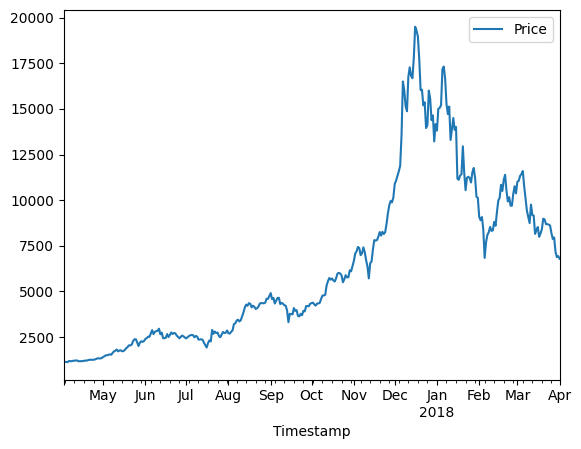

In [23]:
df.plot()

_Underneath the hoods_, está usando a interface `matplotlib.pyplot`. Sendo assim, nós conseguimos criar um gráfico similar com a função `plt.plot()`.

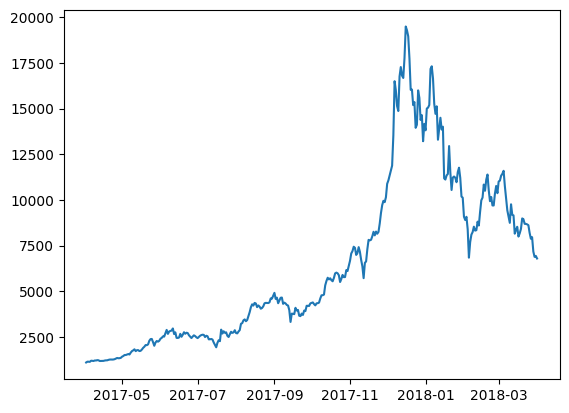

In [24]:
plt.plot(df.index, df['Price'])

`plt.plot()` aceita inúmeros parâmetros, contudo, os dois primeiros são os mais importantes: os valores para `x` e `y`. Outro exemplo:

In [25]:
x = np.arange(-10, 11)

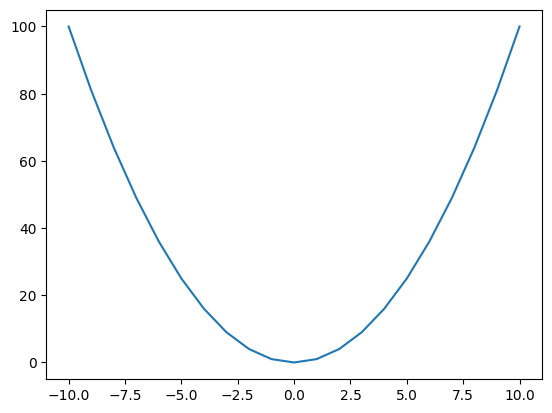

In [32]:
plt.plot(x, x ** 2)

Cada função `plt` altera a visualização final. Caso você queira setar as configurações do seu gráfico, você pode usar a função `plt.figure`, outras como `plt.title` também alteram a visualização do gráfico:

Text(0.5, 1.0, 'My nice plot')

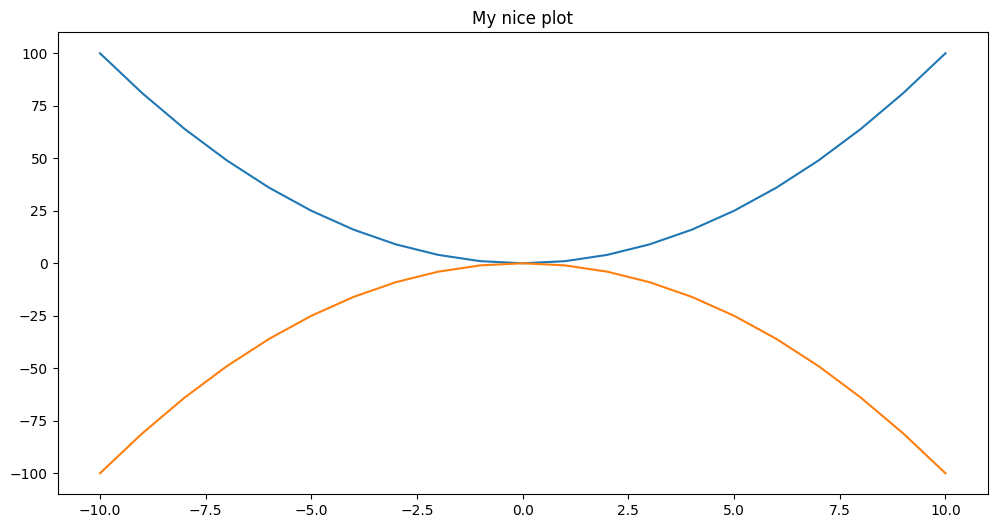

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My nice plot')

Alguns argumentos como `plt.figure` e `plt.plot` estão disponíveis no pandas:

<Axes: title={'center': 'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

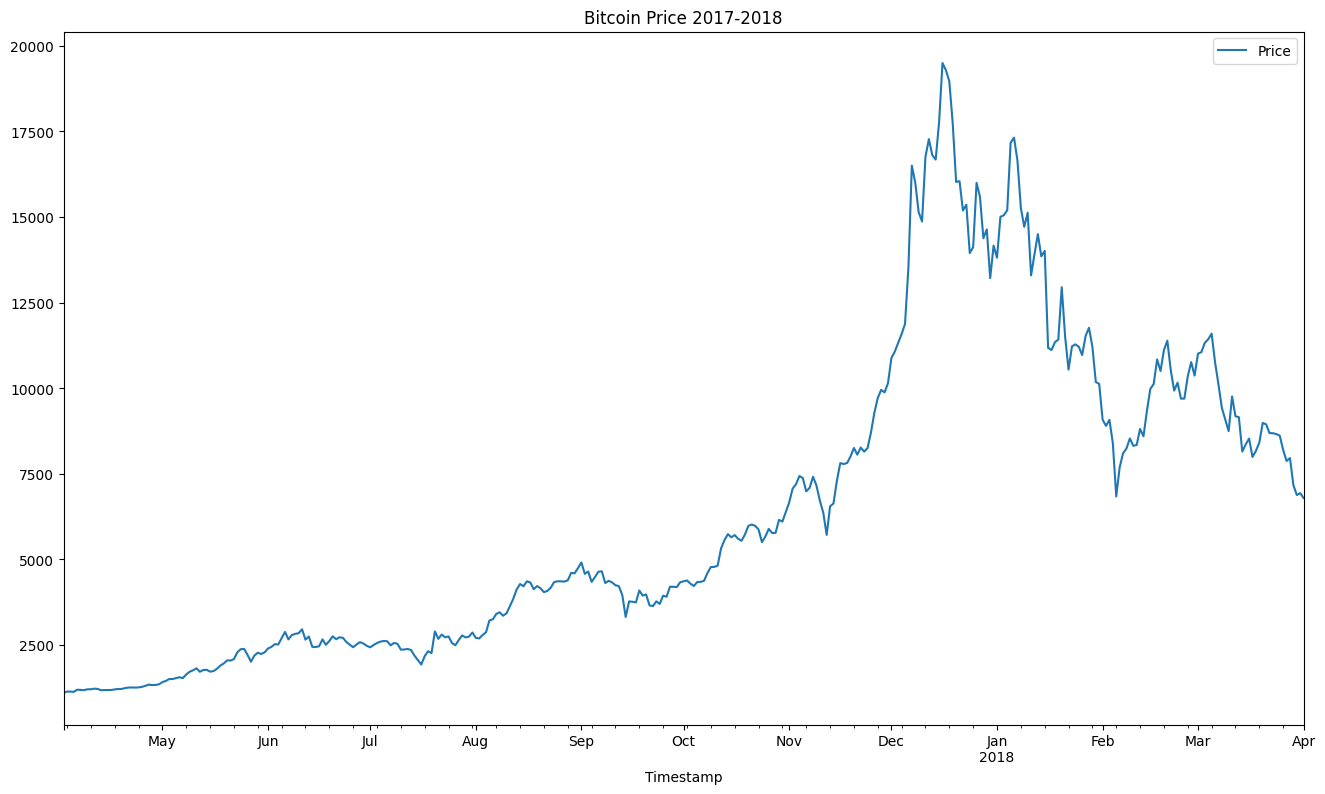

In [34]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

### A more challenging parsing

A fim de demonstrarmos a plotagem de duas colunas juntas, iremos adicionar os preços do Ether ao nosso DataFrame. 

In [35]:
eth = pd.read_csv('data/eth-price.csv')

eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Primeiro, precisamos converter uma das datas para conseguirmos combiná-las com nosso DataFrame. No nosso exemplo, iremos converter o campo `Date(UTC)`.

In [36]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Colocando tudo junto:

In [37]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


Agora somos capazes de combinar ambos os DataFrames. Ambos possuem os mesmos índices, então, alinhar ambos os preços será algo tranquilo. Primeiramente, vamos criar um `DataFrame` vazio e com o índice dos preços do Bitcoin:

In [38]:
prices = pd.DataFrame(index=df.index)

In [39]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


E nós podemos simplesmente setar colunas de outras DataFrames:

In [40]:
prices['Bitcoin'] = df['Price']
prices['Ether'] = eth['Value']

In [41]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


Agora, vamos tentar plotar os gráficos:

<Axes: xlabel='Timestamp'>

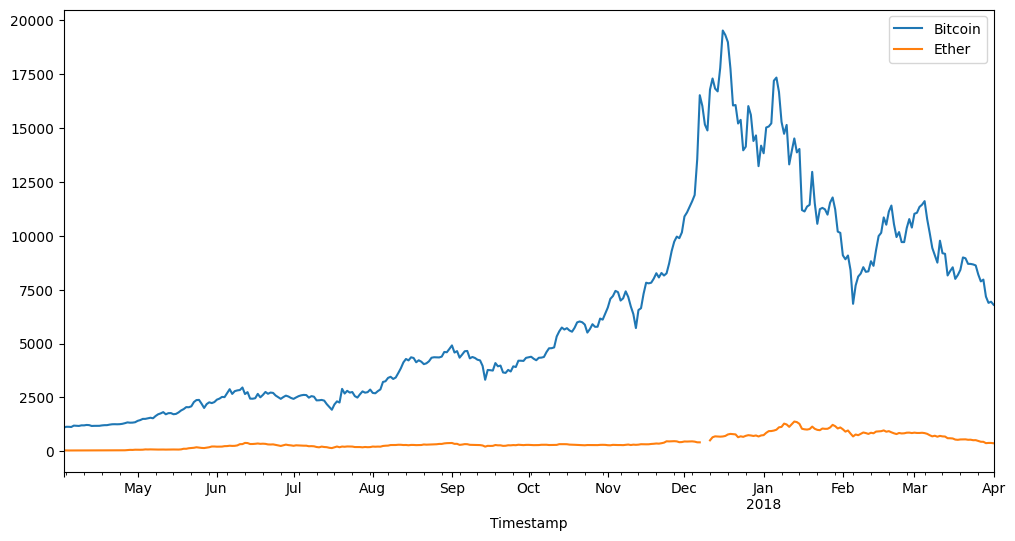

In [42]:
prices.plot(figsize=(12, 6))